## Table of contents:
* [Python basics](#basics)
* [Data handling with NumPy](#numpy)
* [Plotting with Matplotlib](#matplotlib)
* [Physical constants and curve fitting with SciPy](#scipy)

# Python basics <a class="anchor" id="basics"></a>

Defining a variable is quite easy in Python. The data type is recognized implicitly.

In [1]:
a = 1                   # an integer value (int)
b = 1.1                 # a floating point value (float)
c = 'one point two'     # a string
d = 1.0 + 0.4j          # a complex number, note the use of j instead of i
e = [1.0, 0.5]          # a list consisting of floats

print(type(a))
print(type(b))
print(type(c))
print(type(d))
print(type(e))
print(a,b,c,d,e)

# the variable name can be reused for a different data type without problems
a = 'something different'
print(type(a))

<class 'int'>
<class 'float'>
<class 'str'>
<class 'complex'>
<class 'list'>
1 1.1 one point two (1+0.4j) [1.0, 0.5]
<class 'str'>


You can define your own functions:

In [2]:
def func(x, a, b): #
    
    #any code to produce the output can go here
    c = 1 * b
    
    return a * x + c

print(func(10,2.4,3))

27.0


In [2]:
# an alternative way to define the same function which looks a bit cleaner. Seperate the input into the variable x and the parameters p.
def func(x,*p): #
    a, b = p
    
    return a * x + b

params = [2.4,3]
print(params)
print(*params)

print(func(10,*params)) #the * is used to 'unpack' the params list.

[2.4, 3]
2.4 3
27.0


You can also create for loops and if/else statements.

In [3]:
for x in [0,1,2,3,4,5,6,7,8,9]: # a loop over each of the elements in the list. 
    y = x+1
    
    if y > 4:
        print(y)
        
    else: 
        print(-y)

-1
-2
-3
-4
5
6
7
8
9
10


# NumPy  <a class="anchor" id="numpy"></a>

NumPy is a library useful for handling, processing and analysing large datasets. Documentation can be found at https://numpy.org/doc/stable/index.html.

In [5]:
import numpy as np

Some useful constants:

In [6]:
print(np.pi)
print(np.e)

3.141592653589793
2.718281828459045


Numpy also has a number of common functions which could come in handy. A list can be found at https://numpy.org/doc/stable/reference/routines.math.html. Some examples:

In [7]:
print(np.exp(1))
print(np.log(1))
print(np.sin(1))
print(np.cos(1))
print(np.arcsin(1))
print(np.arccos(1))

2.718281828459045
0.0
0.8414709848078965
0.5403023058681398
1.5707963267948966
0.0


#### Numpy arrays ####


The inbuilt functions for creating arrays can be found at https://numpy.org/doc/stable/reference/routines.array-creation.html. Lets start by making a NumPy array from a standard Python list.

In [8]:
x = np.array([-10.0,10.0,1.0])
print(x)

[-10.  10.   1.]


Often its quicker to call some function to fill the entries for you instead of filling them in by hand, for example if you want a list of equally spaced numbers.

In [12]:
x = np.arange(-10.0,10.0,1.0) #Starting value, stopping value, stepsize. Note that the array ends *before* the stopping value
print(x)

# These kind of lists are useful when creating for loops:
for i in x:
    print(i)

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]
-10.0
-9.0
-8.0
-7.0
-6.0
-5.0
-4.0
-3.0
-2.0
-1.0
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


The arrays can have any finite dimensions, for example a 4x5 matrix. 

In [14]:
y = np.zeros((4,5),dtype=np.float64) ## Creating a 4x5 array with zeros at all spots
print(y)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


You can select a certain subarray to do something with it, here we change the second row:

In [15]:
y[1,:] = np.arange(0,5,1) ## Setting a certain subarray to a different value
print(y)

[[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 4.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


Note that the second row is adressed by using the index 1. Counting starts at 0, so you can access the elements of a 1D 4 element array with the indices 0,1,2,3 . For the second index I used :, which is short-hand for "all elements". You can also take more specific subslices using startingvalue:endvalue:stepsize. If you do not give the actual values between the :'s, they will default to 0, max, and 1 respectively. Lets take only the 1st, 3rd and 5th column of y in two ways:

In [16]:
print(y[:,0:5:2])
print(y[:,::2])

[[0. 0. 0.]
 [0. 2. 4.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 2. 4.]
 [0. 0. 0.]
 [0. 0. 0.]]


Operations with arrays are interpreted by NumPy according to what shape the inputs are. If x and y are arrays of the same shape, then x+y or x*y will perform the operation element-wise.

In [17]:
z = y + y
print(z)

[[0. 0. 0. 0. 0.]
 [0. 2. 4. 6. 8.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [18]:
print(z * y)

[[ 0.  0.  0.  0.  0.]
 [ 0.  2.  8. 18. 32.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


If, however, one of the two is just a number, Numpy will apply the operation to the entire array:

In [19]:
print(y + 1)

[[1. 1. 1. 1. 1.]
 [1. 2. 3. 4. 5.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


Arrays have certain attributes, like size and data type. Getting the size of a (sub)array is quite useful for when you want to loop over the elements for example.

In [21]:
print(y.ndim)  #Number of dimensions
print(y.shape) #Size of the dimensions
print(y.size)  #Total number of elements in the arraydimensions
print(y.dtype) #Data type of the elements
print(y.real)  #The real part of the array
print(y.imag)  #The imaginary part of the array
print(y.T)     #The array transposed

2
(4, 5)
20
float64
[[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 4.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 2. 0. 0.]
 [0. 3. 0. 0.]
 [0. 4. 0. 0.]]


#### Importing and manipulating data ####

Lets import some data from a file. The file named 'ExampleiOLabData.csv' contains some iOLab data. These files have descriptions of what each column represents on the first row. We want to read the actual data. Using the function np.loadtxt we load in the data from the csv file, storing the entries as floats, interpreting commas as seperators between the values and skipping the first row.

In [22]:
file   = 'ExampleiOLabData.csv'
data   = np.loadtxt(file,dtype = np.dtype(float), delimiter = ',',skiprows = 1)

We can easily compute some properties of the data in the sixth column using some NumPy functions.

In [24]:
print(np.mean(data[:,5])) # the mean
print(np.std(data[:,5])) # the standard deviation
print(np.var(data[:,5])) # the variance
print(np.amin(data[:,5])) # the smallest value
print(np.amax(data[:,5])) # the largest value

-0.40871283251457785
2.185772857970599
4.777602986640961
-9.26978
4.54985


# Matplotlib # <a class="anchor" id="matplotlib"></a>

Matplotlib is a library of functions for plotting data. Very similar to plotting in Matlab. Documentation and tutorials can be found at https://matplotlib.org/tutorials/index.html.

In [26]:
import matplotlib.pyplot as plt

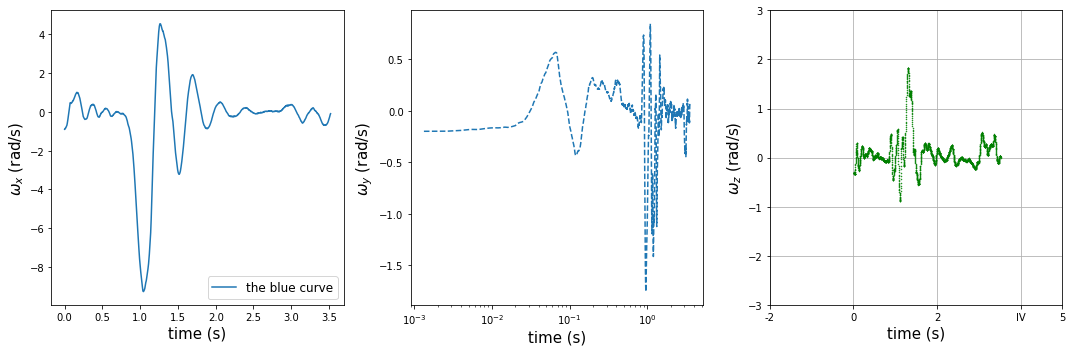

In [27]:
#A figure with three graphs of the iOLab data
fig, axs = plt.subplots(1,3,figsize=(15, 5));  #Initializing the figure with one row and three columns of subplots and specifying the size.
axs[0].plot(data[:,3],data[:,5],label = 'the blue curve'); # Plotting a graph in the first subplot and labeling it for the legend.
axs[0].set_xlabel('time (s)', fontsize = 15);  # Setting the x-label of the first subplot
axs[0].set_ylabel(r'$\omega_x$ (rad/s)', fontsize = 15);
axs[0].legend(loc = 'lower right', fontsize  = 12) # Making a legend for the first subplot and specifying the position.

axs[1].plot(data[:,3],data[:,7], linestyle = 'dashed'); # Plotting a graph in the second subplot, with a different kind of connecting line.
axs[1].set_xlabel('time (s)', fontsize = 15);
axs[1].set_ylabel(r'$\omega_y$ (rad/s)', fontsize = 15);
axs[1].set_xscale('log') # Setting the x-scale to be logarithmic

axs[2].plot(data[:,3],data[:,9], color='green', marker='.', linestyle='none', markersize=1); # Plotting a graph in the thirds subplot, with green dots instead of a line.
axs[2].set_xlabel('time (s)', fontsize = 15);
axs[2].set_ylabel(r'$\omega_z$ (rad/s)', fontsize = 15);
axs[2].set_xlim([-2.0,5.0]) # Setting the plotrange along the x-axis.
axs[2].set_ylim([-3.0,3.0])
axs[2].set_xticks([-2,0,2,4,5])  #setting custom x-ticks
axs[2].set_xticklabels([-2,0,2,'IV',5])  #setting what to write on the ticks
axs[2].grid() # Drawing a grid.

plt.tight_layout() # Cleaning up the layout
plt.savefig('Gyroscopeplot.pdf') #Saving the figure to a pdf file

A plot of data with errorbars

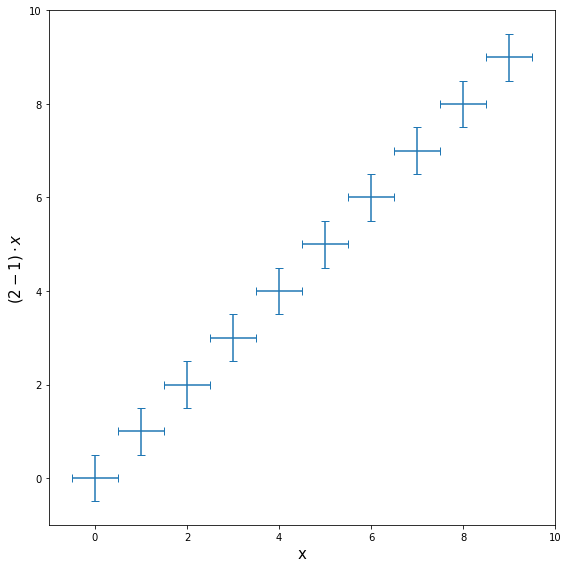

In [28]:
fig, axs = plt.subplots(1,1,figsize=(8, 8));

axs.errorbar(np.arange(0,10),np.arange(0,10),0.5*np.ones(10),0.5*np.ones(10),linestyle='none',capsize = 4);
#axs.errorbar(xdata,ydata,xerror,yerror,linestyle='none',capsize = 4);
axs.set_xlabel('x', fontsize = 15);
axs.set_ylabel(r'$(2-1) \cdot x$', fontsize = 15);

plt.tight_layout()

Plotting a function

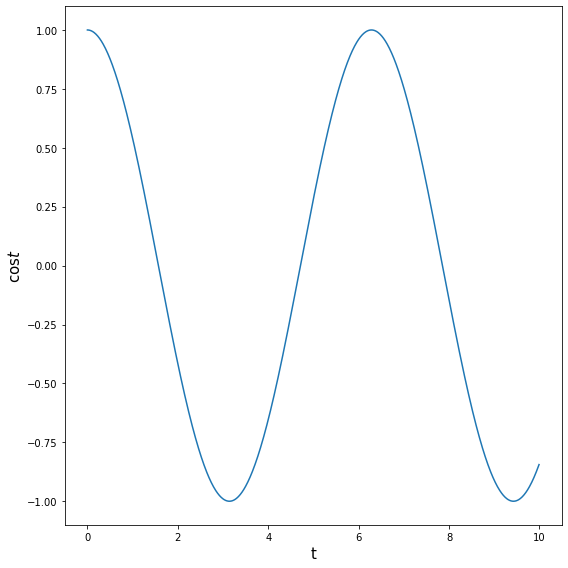

In [29]:
#First create the x and y data.
t = np.arange(0,10,0.01)
cost = np.cos(t)

fig, axs = plt.subplots(1,1,figsize=(8, 8));

axs.plot(t,cost);
#axs.errorbar(xdata,ydata,xerror,yerror,linestyle='none',capsize = 4);
axs.set_xlabel('t', fontsize = 15);
axs.set_ylabel(r'$\cos t$', fontsize = 15);

plt.tight_layout()

# Physical constants and curve fitting with SciPy # <a class="anchor" id="scipy"></a>

SciPy is a library of functions which build upon NumPy with more complicated procedures, such as curve fitting, statistics and integration. It also has some commonly used physical constants: https://docs.scipy.org/doc/scipy/reference/constants.html

In [30]:
import scipy.constants as const
print(const.c)
print(const.hbar)
print(const.g)
print(const.e)
print(const.Avogadro)
print(const.k)
print(const.m_e)
print(const.e)

299792458.0
1.0545718176461565e-34
9.80665
1.602176634e-19
6.02214076e+23
1.380649e-23
9.1093837015e-31
1.602176634e-19


In [31]:
from scipy.optimize import curve_fit

In [32]:
xdata = [0.0,1.0,2.0,3.0]
ydata = [0.0,0.8,2.2,3.1]
ysigma = [0.1,0.2,0.1,0.2]

InitialValues = [1,0]

OptimalValues, CovarianceMatrix = curve_fit(func,xdata,ydata,sigma = ysigma,p0 = InitialValues)

In [33]:
print(OptimalValues)
print(np.diag(CovarianceMatrix))

[ 1.07413793 -0.01896552]
[0.00419144 0.01089774]


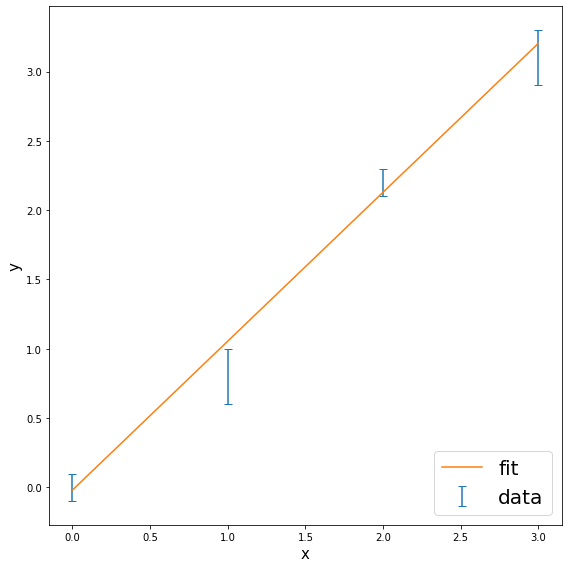

In [34]:
#Plot data with errorbars and a fitted curve.
fig, axs = plt.subplots(1,1,figsize=(8, 8));

axs.errorbar(xdata,ydata,yerr = ysigma*np.ones(4),linestyle='none',capsize = 4, label = 'data');
axs.plot(np.arange(0.0,4.0,1.0),func(np.arange(0.0,4.0,1.0),*OptimalValues), label = 'fit');
#axs.errorbar(xdata,ydata,xerror,yerror,linestyle='none',capsize = 4);
axs.set_xlabel('x', fontsize = 15);
axs.set_ylabel('y', fontsize = 15);

axs.legend(loc = 'lower right',fontsize=20)
plt.tight_layout()